In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#DATA SOURCE: https://psl.noaa.gov/data/gridded/data.ghcncams.html

ncf = r'D:\work\workshops\Data Mining\datasets\air.mon.mean.nc'
dset = xr.open_dataset(ncf)

#print(dset['air'].loc[dict(time=slice('2019-12-01','2020-01-01'))])

#print(dset['air'].loc[dict(lat=89.75)])

# mask = (
#      (dset['air'].coords["lat"] > 42.25)
#      & (dset['air'].coords["lat"] < 43)
#      & (dset['air'].coords["lon"] > 23)
#      & (dset['air'].coords["lon"] < 24)
# )

# sofia = dset['air'].where(mask,drop=True)

sofia = dset['air'].sel(lat=42.75).sel(lon=23.75)

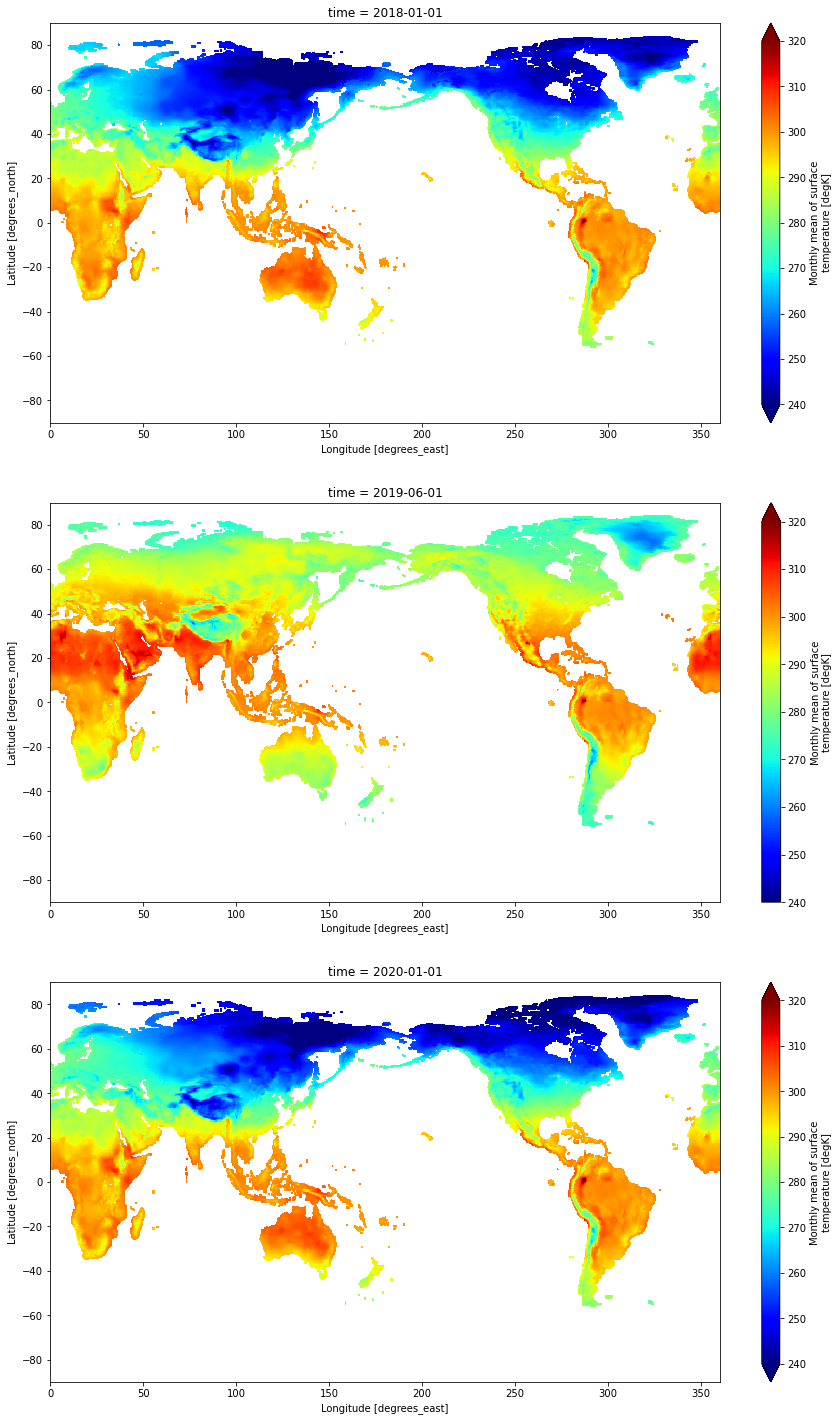

In [2]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,25))

dset['air'].sel(time='2018-01-01').plot(cmap='jet', vmin=240, vmax=320, ax=axes[0])
dset['air'].sel(time='2019-06-01').plot(cmap='jet', vmin=240, vmax=320, ax=axes[1])
dset['air'].sel(time='2020-01-01').plot(cmap='jet', vmin=240, vmax=320, ax=axes[2])

plt.draw()

In [3]:
def filter_by(df, constraints):
    """Filter MultiIndex by sublevels."""
    indexer = [constraints[name] if name in constraints else slice(None)
               for name in df.index.names]
    return df.loc[tuple(indexer)] if len(df.shape) == 1 else df.loc[tuple(indexer),]

pd.DataFrame.filter_by = filter_by

In [4]:
x = dset['air'].sel(time='2020-01-01')
xdf : pd.DataFrame = x.to_dataframe()
xdf.filter_by({'lat' : [42.75], 'lon': [23.75]})

time         air
lat   lon                         
42.75 23.75 2020-01-01  270.501892

In [5]:
x = dset['air'].sel(time='2018-01-01')
xdf : pd.DataFrame = x.to_dataframe()
xdf.filter_by({'lat' : [42.75], 'lon': [23.75]})

time         air
lat   lon                         
42.75 23.75 2018-01-01  271.979828

In [6]:
sdf = sofia.to_dataframe()
sdf.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', name='time', length=879, freq=None)

In [7]:
sdf = sdf.drop(['lat', 'lon'], axis=1)
sdf

air
time                  
1948-01-01  269.459991
1948-02-01  265.380005
1948-03-01  268.059998
1948-04-01  274.390015
1948-05-01  278.779999
...                ...
2020-11-01  275.607941
2020-12-01  273.810822
2021-01-01  271.659515
2021-02-01  273.088898
2021-03-01  271.730652

[879 rows x 1 columns]

In [8]:
sdf = sdf.apply(lambda x: x-273.15)
sdf.loc['1948-01-01':'1958-01-01']

air
time                
1948-01-01 -3.690002
1948-02-01 -7.769989
1948-03-01 -5.089996
1948-04-01  1.240021
1948-05-01  5.630005
...              ...
1957-09-01  9.040009
1957-10-01  6.480011
1957-11-01  0.339996
1957-12-01 -4.790009
1958-01-01 -5.339996

[121 rows x 1 columns]

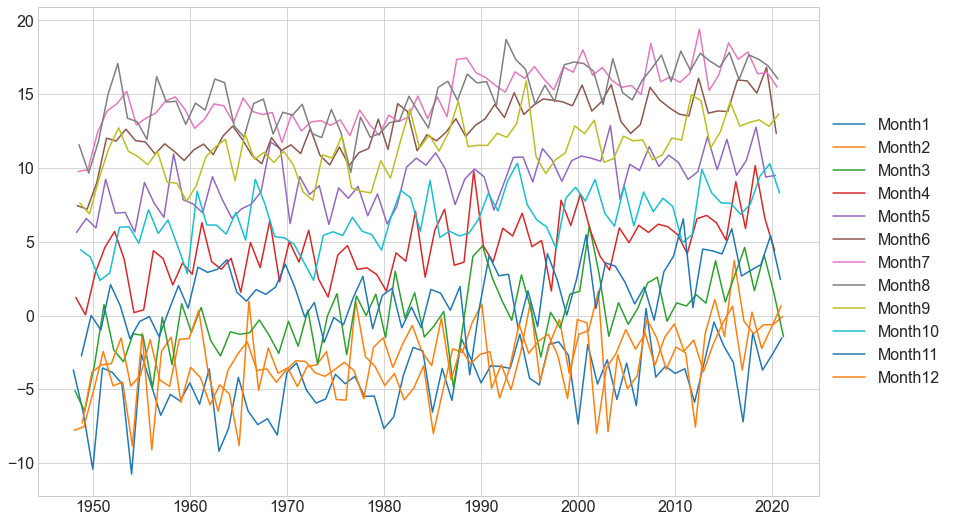

In [9]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (14, 9),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
# plt.style.use('ggplot')

fig, ax = plt.subplots()

for m in range(1,13):
    ax.plot(sdf.iloc[sdf.index.month==m], axes = ax, label = "Month"+str(m))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()